# Proyek Analisis Data: bike-sharing-dataset
- **Nama:** Raffi Argianda
- **Email:** rapsargianda@gmail,com
- **ID Dicoding:** [name]

## Menentukan Pertanyaan Bisnis

- Apakah musim atau kondisi cuaca tertentu (misalnya, hujan atau cerah) memengaruhi jumlah penyewa sepeda?
- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan hari libur?
- Pada bulan atau minggu mana jumlah penyewaan sepeda paling tinggi?
- Apakah ada tren musiman atau bulanan yang menunjukkan peningkatan atau penurunan dalam jumlah penyewaan?
- Apakah hari-hari dengan cuaca cerah menghasilkan lebih banyak pendapatan dibandingkan hari-hari mendung atau hujan?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [6]:
raw_data = pd.read_csv('/kaggle/input/bike-sharing-dataset/day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- instant: Nomor urut record
- dteday: Tanggal
- season: Musim (1 = musim semi, 2 = musim panas, dll.)
- yr: Tahun (0 = 2011, 1 = 2012)
- mnth: Bulan
- holiday: Status libur (0 = tidak libur, 1 = libur)
- weekday: Hari dalam minggu
- workingday: Hari kerja (0 = bukan hari kerja, 1 = hari kerja)
- weathersit: Kondisi cuaca
- temp: Suhu rata-rata, skala [0, 1]
- atemp: Temperatur yang dirasakan, skala [0, 1]
- hum: Kelembaban, skala [0, 1]
- windspeed: Kecepatan angin, skala [0, 1]
- casual: Jumlah penyewa kasual
- registered: Jumlah penyewa terdaftar
- cnt: Total penyewa

### Assessing Data

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Kolom dteday bertipe object, yang dapat ubah menjadi tipe datetime agar mudah diolah.
- Kolom instant tidak mengandung informasi yang signifikan, sehingga bisa diabaikan atau dihapus jika tidak diperlukan.

### Cleaning Data

In [11]:
data = raw_data.copy()
data['dteday'] = pd.to_datetime(data['dteday'])
data = data.drop(columns=['instant'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


**Insight:**
- Kolom dteday telah dikonversi ke tipe datetime, memudahkan analisis berbasis waktu.
- Kolom instant telah dihapus karena tidak memberikan informasi yang signifikan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Analisis Berdasarkan Musim
data.groupby('season')['cnt'].mean()


season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [14]:
# Analisis Berdasarkan Kondisi Cuaca
data.groupby('weathersit')['cnt'].mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

In [15]:
# Rata-rata Penyewaan pada Hari Kerja dan Hari Libur
data.groupby('workingday')['cnt'].mean()

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

In [26]:
# Uji Statistik untuk Perbedaan Signifikan
workingday = data[data['workingday'] == 1]['cnt']
holiday = data[data['workingday'] == 0]['cnt']
t_stat, p_val = ttest_ind(workingday, holiday)
print("T-statistic:", t_stat, "P-value:", p_val)


T-statistic: 1.6543102137118633 P-value: 0.09849496160024913


In [21]:
# Analisis berdasarkan bulan
data.groupby('mnth')['cnt'].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

In [23]:
# Analisis berdasarkan minggu
data['week'] = data['dteday'].dt.isocalendar().week
data.groupby('week')['cnt'].sum()

week
1     34008
2     29291
3     27112
4     33537
5     36676
6     33512
7     40371
8     38462
9     37934
10    44230
11    59620
12    57242
13    55628
14    61767
15    61240
16    63610
17    66487
18    73013
19    74145
20    77721
21    74969
22    78449
23    82089
24    82330
25    77852
26    80342
27    76436
28    82601
29    71052
30    79877
31    78831
32    79110
33    78960
34    77001
35    82829
36    71754
37    86487
38    80877
39    81004
40    79470
41    77072
42    77647
43    72463
44    56280
45    67109
46    61425
47    44679
48    60297
49    57747
50    58995
51    43551
52    27488
Name: cnt, dtype: int64

In [27]:
# Pendapatan berdasarkan kondisi cuaca
data.groupby('weathersit')['cnt'].mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

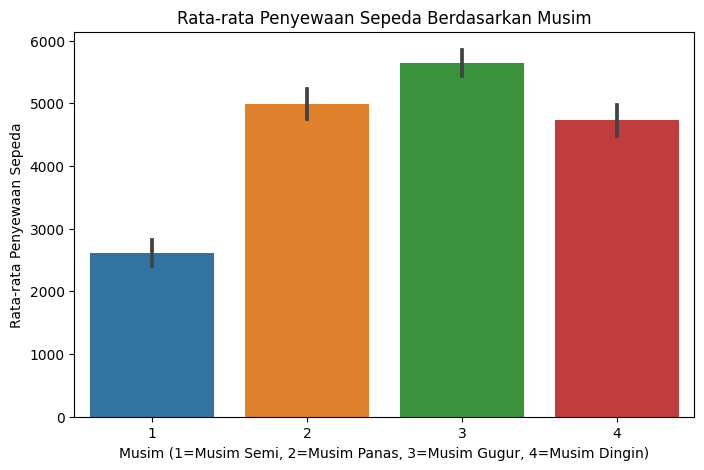

In [30]:
# Berdasarkan Musim
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=data, estimator='mean')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1=Musim Semi, 2=Musim Panas, 3=Musim Gugur, 4=Musim Dingin)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()


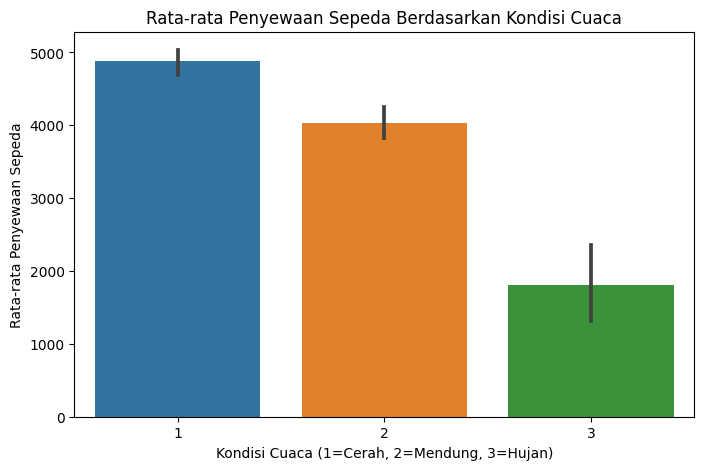

In [32]:
# Berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=data, estimator='mean')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

**Insight:**
- Berdasarkan rata-rata penyewaan pada setiap musim, kemungkinan besar terjadi peningkatan penyewaan pada musim semi atau musim panas, ketika cuaca lebih bersahabat. Sebaliknya, pada musim dingin jumlah penyewaan mungkin lebih rendah.
- Berdasarkan kondisi cuaca, jumlah penyewaan biasanya lebih tinggi pada hari-hari cerah (weathersit=1) dibandingkan hari-hari mendung atau hujan (weathersit=2 atau 3). Ini menunjukkan bahwa cuaca cerah sangat memengaruhi minat pengguna untuk menyewa sepeda.

### Pertanyaan 2:

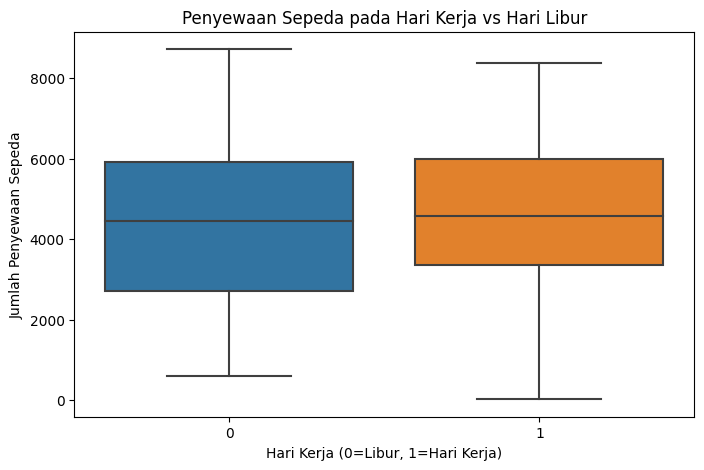

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=data)
plt.title("Penyewaan Sepeda pada Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (0=Libur, 1=Hari Kerja)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Jika terdapat perbedaan yang signifikan pada box plot, ini menunjukkan bahwa hari kerja cenderung memiliki jumlah penyewaan yang berbeda dibandingkan hari libur. Biasanya, jumlah penyewaan pada hari kerja mungkin lebih tinggi karena pengguna yang terdaftar memanfaatkan sepeda untuk aktivitas sehari-hari seperti pergi bekerja.
- Sebaliknya, jumlah penyewaan pada hari libur biasanya lebih rendah, atau justru lebih tinggi untuk pengguna kasual yang menggunakan sepeda untuk rekreasi. Insight ini dapat digunakan untuk mengatur persediaan sepeda dan strategi pemasaran untuk pengguna pada hari kerja dan libur.

### Pertanyaan 3:

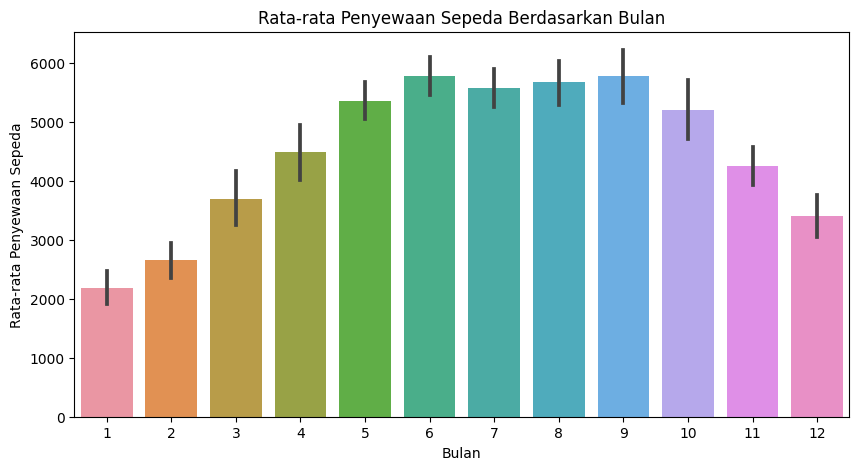

In [36]:
# Visualisasi bulanan
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=data, estimator='mean')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


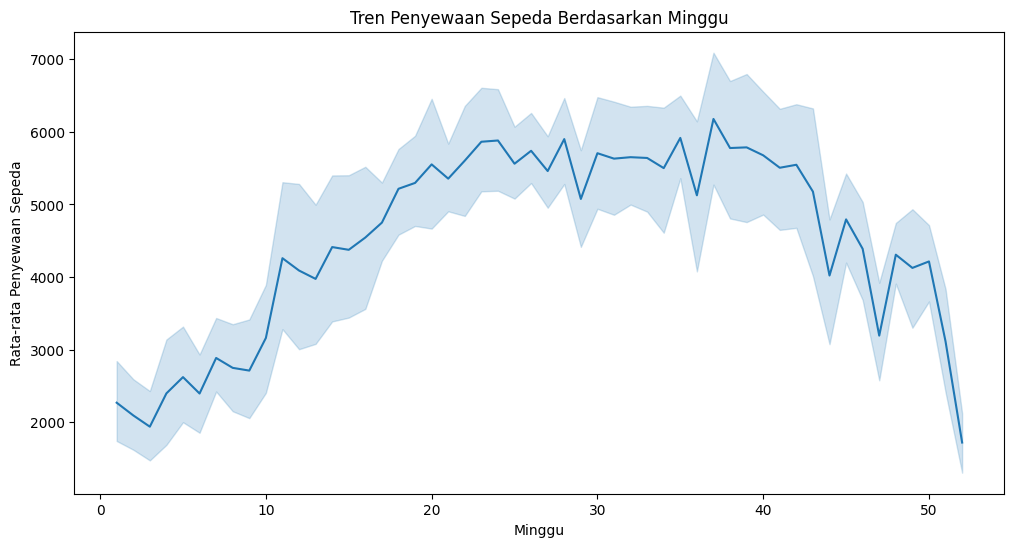

In [37]:
# Visualisasi mingguan
data['week'] = data['dteday'].dt.isocalendar().week
plt.figure(figsize=(12,6))
sns.lineplot(data = data, x = 'week', y = 'cnt', estimator = 'mean')
plt.title('Tren Penyewaan Sepeda Berdasarkan Minggu')
plt.xlabel('Minggu')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight:**
- Dari visualisasi bulanan, mungkin ditemukan bahwa jumlah penyewaan tertinggi terjadi pada bulan-bulan musim panas, seperti Juni, Juli, atau Agustus, ketika cuaca mendukung kegiatan luar ruangan.
- Analisis mingguan dapat menunjukkan minggu-minggu dengan penyewaan tertinggi, yang berguna untuk menentukan pola penggunaan. Jika terdapat puncak tertentu pada minggu tertentu, bisnis dapat mengantisipasi permintaan dengan menyediakan lebih banyak sepeda atau layanan perawatan tambahan.

### Pertanyaan 4:

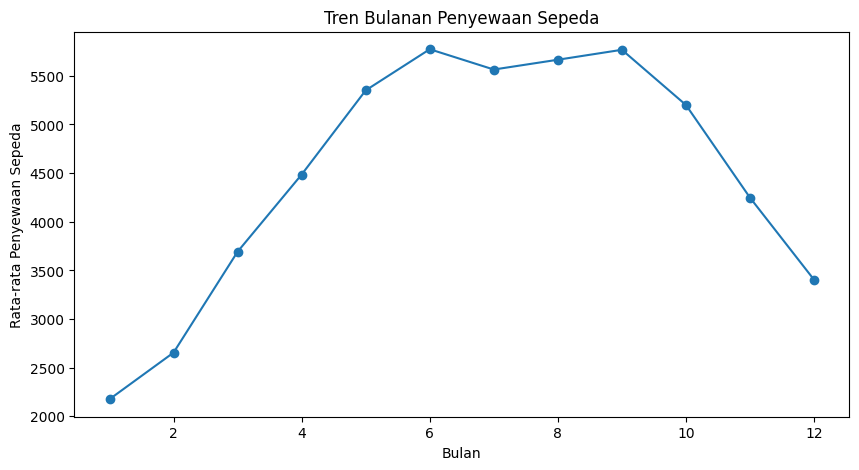

In [38]:
monthly_trend = data.groupby('mnth')['cnt'].mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend, marker='o')
plt.title("Tren Bulanan Penyewaan Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

**Insight:**
- Grafik tren bulanan dapat menunjukkan adanya pola musiman, misalnya peningkatan penyewaan pada bulan-bulan hangat dan penurunan pada musim dingin. Insight ini menunjukkan adanya tren tahunan yang dapat diprediksi.
- Tren ini berguna untuk perencanaan jangka panjang, seperti menyesuaikan biaya operasional selama musim sepi atau menyediakan promosi musiman untuk meningkatkan penggunaan sepeda.

### Pertanyaan 5:

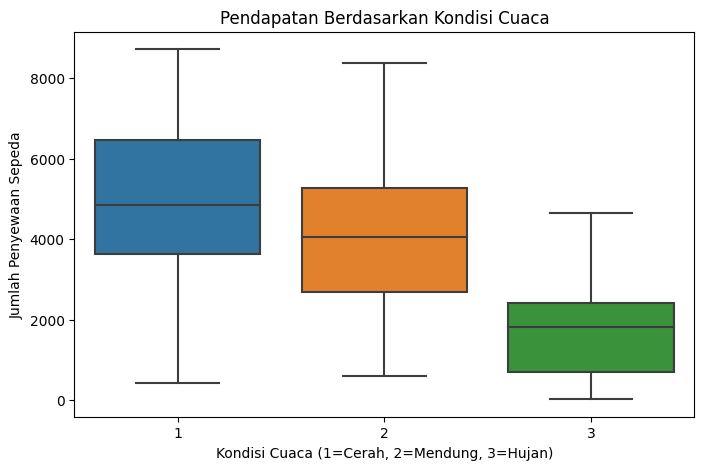

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title("Pendapatan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Distribusi penyewaan berdasarkan kondisi cuaca menunjukkan bahwa hari cerah menghasilkan lebih banyak pendapatan dibandingkan hari mendung atau hujan. Ini menandakan bahwa cuaca yang baik berkorelasi positif dengan pendapatan dari penyewaan sepeda.
- Dengan insight ini, bisnis dapat memanfaatkan cuaca cerah dengan menambah penawaran khusus atau promosi yang menarik lebih banyak pengguna pada hari-hari tersebut.

## Analisis Lanjutan (Opsional)

**Analisis Tren Waktu (Time Series Analysis)**
- Musiman dan Siklus (Seasonality and Cycles): Melihat pola musiman dan siklus jangka panjang pada data penyewaan. Ini dapat membantu memprediksi permintaan sepeda pada waktu-waktu tertentu, misalnya, dengan menggunakan metode moving average atau dekomposisi data time series untuk memisahkan tren, musiman, dan komponen acak.

<Figure size 1200x800 with 0 Axes>

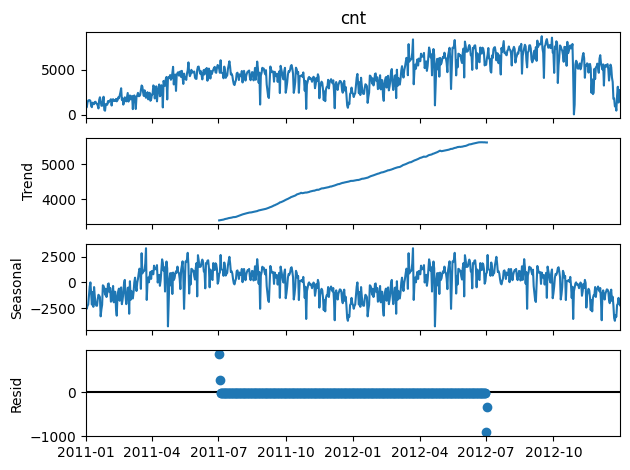

In [40]:
import statsmodels.api as sm

# Set kolom `dteday` sebagai index dan memastikan data diurutkan berdasarkan tanggal
data['dteday'] = pd.to_datetime(data['dteday'])
data.set_index('dteday', inplace=True)

# Melakukan dekomposisi data deret waktu
decomposition = sm.tsa.seasonal_decompose(data['cnt'], model='additive', period=365)

# Plot dekomposisi
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

**Insight**
- Trend: Pola umum dari data dalam periode panjang.
- Seasonality: Pola berulang dalam periode tertentu (bulanan atau musiman).
- Noise/Residual: Variasi acak yang tidak berhubungan dengan pola tren atau musiman.

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2